In [35]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole
%reload_ext snakeviz
from collections import namedtuple
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm_notebook as tqdm

from src.analysis import (get_all_tetrode_pair_info, merge_symmetric_key_pairs,
                          get_tetrode_pair_group_from_hdf, get_area_pair_from_hdf,
                          get_all_tetrode_info, get_tetrode_pair_from_hdf)
from src.spectral import plot_coherogram, group_delay_over_time
from src.data_processing import make_epochs_dataframe

In [3]:
path = ('gamma_frequency_coherence_medFreqRes1', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])

In [14]:
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
brain_area_pair_groups.keys()

dict_keys([('PFC', 'iCA1'), ('PFC', 'Ctx'), ('PFC', 'PFC'), ('CA1', 'PFC'), ('CA1', 'iCA1'), ('CA1', 'CA1'), ('CA1', 'Ctx'), ('Ctx', 'Ctx'), ('iCA1', 'iCA1')])

In [3]:
def plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups,
                                      col_wrap=4, figsize=(12, 9)):
    coherence_name, covariate, difference_level = path
    num_groups = len(brain_area_pair_groups)
    level2, level1 = difference_level.split('_')
    num_rows = int(np.ceil(num_groups / col_wrap))

    fig, axes = plt.subplots(num_rows, col_wrap, figsize=figsize, sharex=True, sharey=True)
    axes = axes.flatten()

    for group_ind, brain_area_pair in enumerate(brain_area_pair_groups):
        group_coherence = get_tetrode_pair_group_from_hdf(
            brain_area_pair_groups[brain_area_pair], coherence_name, covariate, difference_level).mean(axis=0)
        mesh = plot_coherogram(group_coherence, axis_handle=axes[group_ind],
                                        vmin=-0.1, vmax=0.1, cmap='RdBu_r')
        axes[group_ind].set_title('-'.join(brain_area_pair))
        axes[group_ind].axvline(0, color='black', linestyle=':')
    for ax in axes[num_groups:]:
        ax.axis('off')
    label = '$\longleftarrow$ {level1} $|$ {level2} $\longrightarrow$'.format(level2=level2, level1=level1)
    clb = plt.colorbar(mesh, ax=axes.tolist(), shrink=0.5, orientation='horizontal', label=label)
    clb.ax.set_title('Coherence Difference')
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        difference_level.replace('_', ' - ').title())
    plt.suptitle(title, fontsize=16)
    
def plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups,
                                      col_wrap=4, figsize=(12, 9)):
    coherence_name, covariate, level = path
    num_groups = len(brain_area_pair_groups)
    num_rows = int(np.ceil(num_groups / col_wrap))

    fig, axes = plt.subplots(num_rows, col_wrap, figsize=figsize, sharex=True, sharey=True)
    axes = axes.flatten()

    for group_ind, brain_area_pair in enumerate(brain_area_pair_groups):
        group_coherence = get_tetrode_pair_group_from_hdf(
            brain_area_pair_groups[brain_area_pair], coherence_name, covariate, level).mean(axis=0)
        mesh = plot_coherogram(group_coherence, axis_handle=axes[group_ind],
                               vmin=-0.1, vmax=0.1, cmap='RdBu_r')
        axes[group_ind].set_title('-'.join(brain_area_pair))
        axes[group_ind].axvline(0, color='black', linestyle=':')
    for ax in axes[num_groups:]:
        ax.axis('off')
    clb = plt.colorbar(mesh, ax=axes.tolist(), shrink=0.5, orientation='horizontal', label='Ripple Coherence')
    clb.ax.set_title('Coherence Difference')
    
    title = '{}\n{}:'.format(coherence_name.replace('_', ' ').title(),
                             covariate.replace('_', ' ').title())
    plt.suptitle(title, fontsize=16)

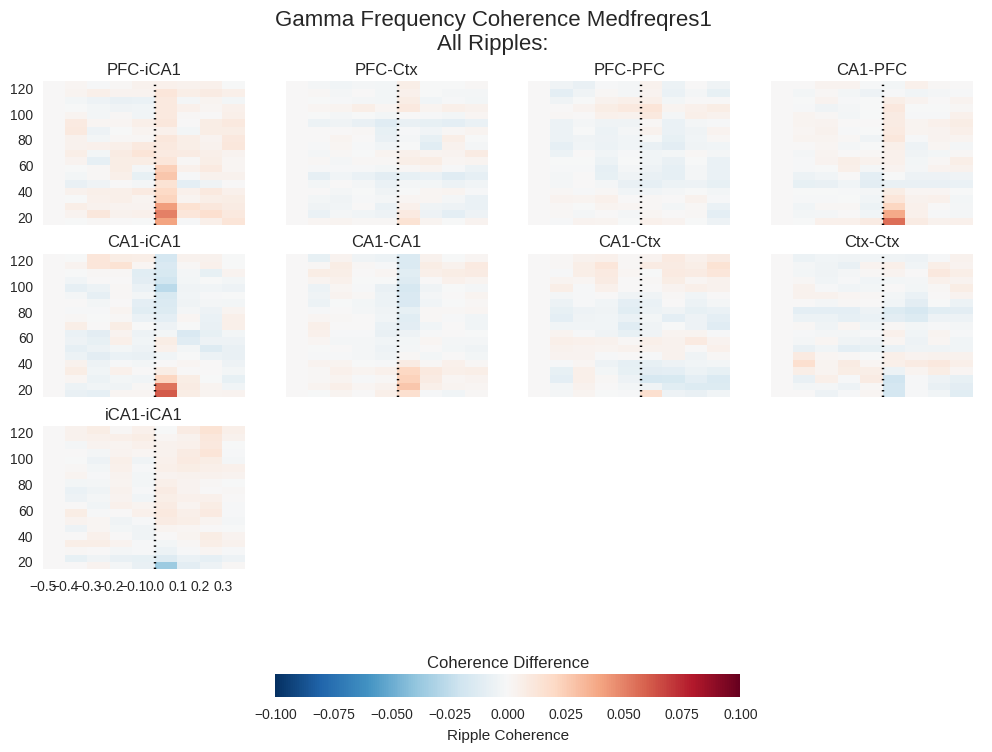

In [18]:
plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups)

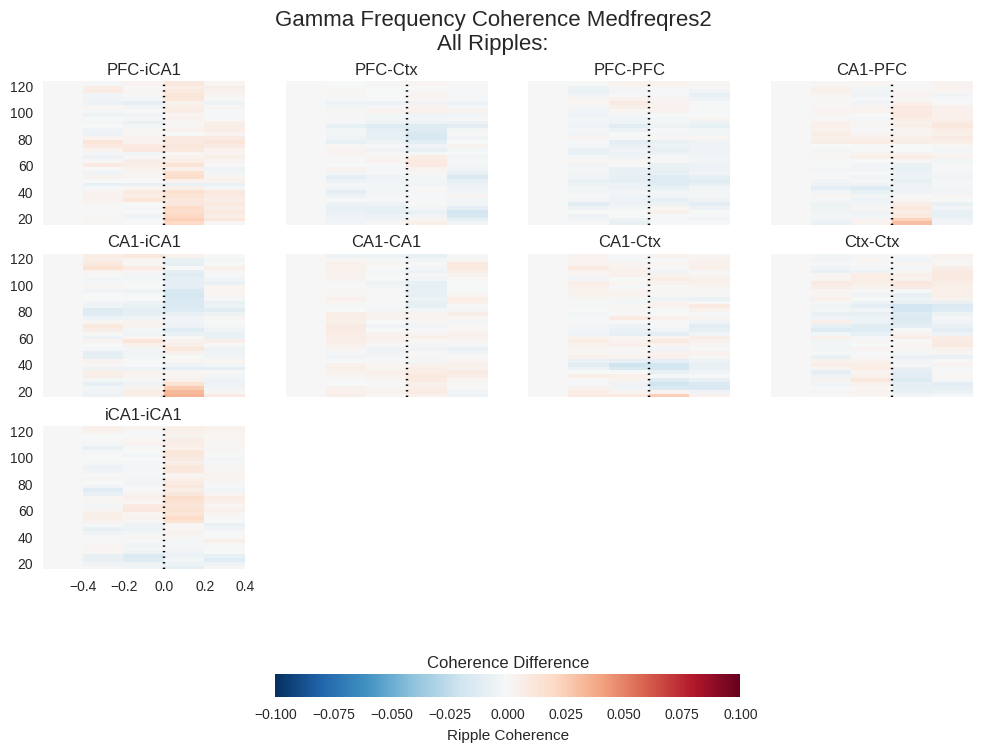

In [19]:
path = ('gamma_frequency_coherence_medFreqRes2', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups)

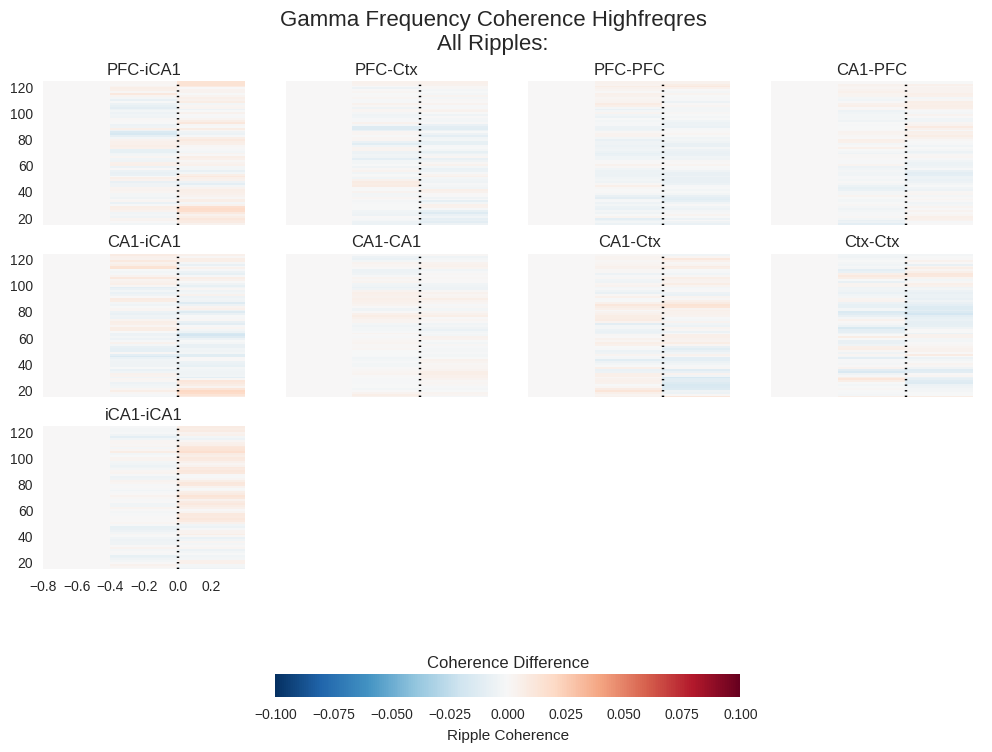

In [21]:
path = ('gamma_frequency_coherence_highFreqRes', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups)

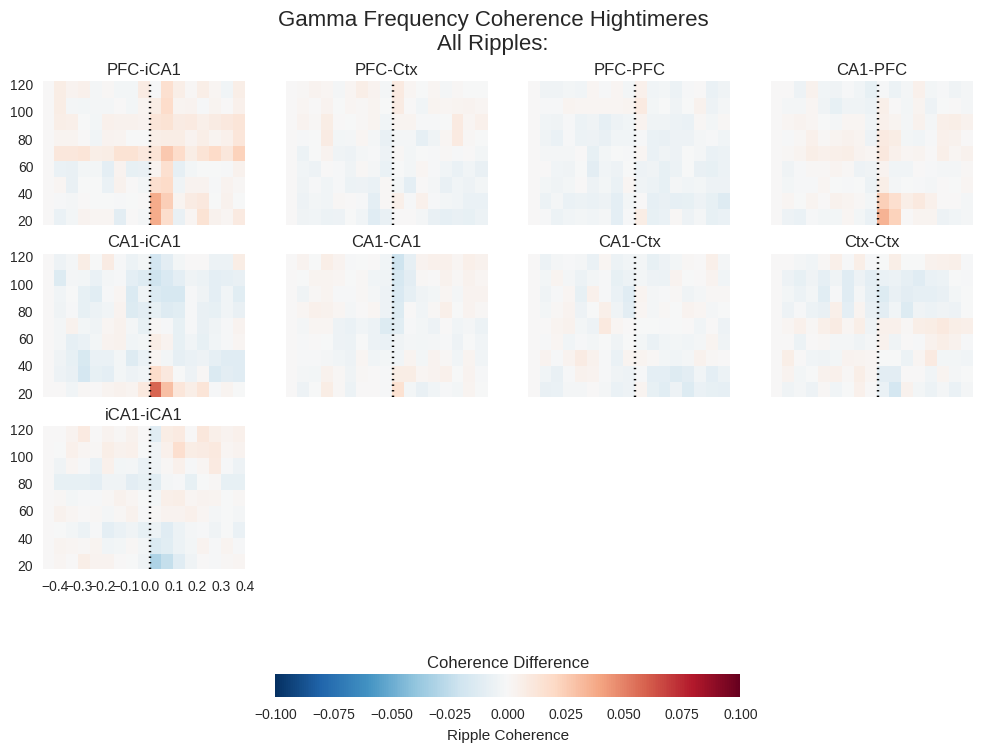

In [22]:
path = ('gamma_frequency_coherence_highTimeRes', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Low Frequencies

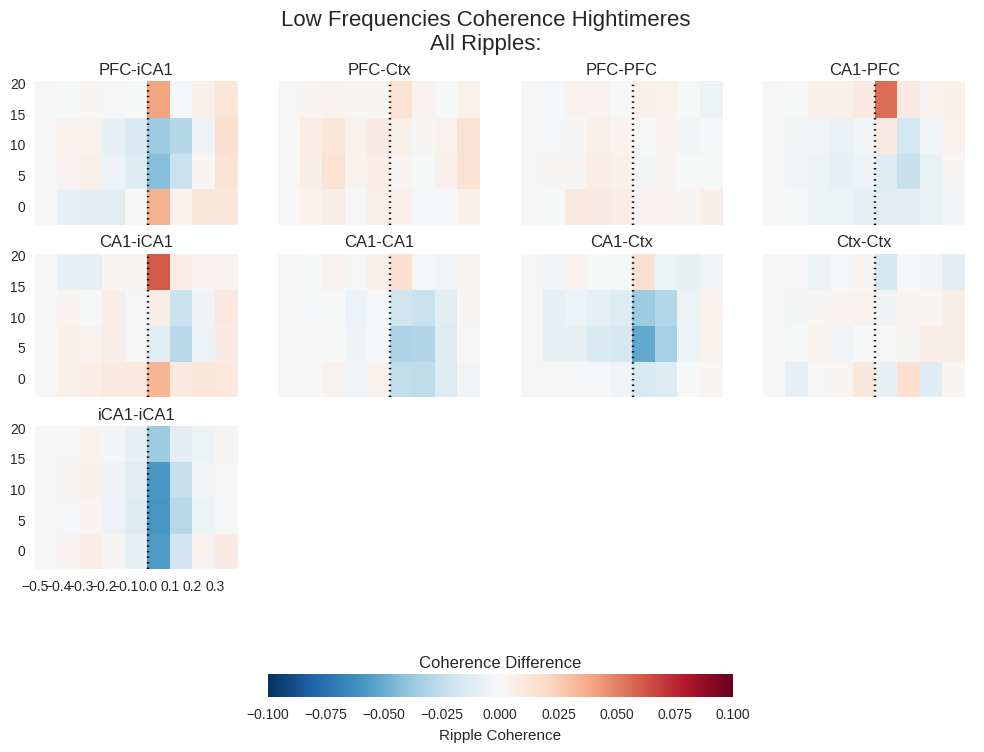

In [23]:
path = ('low_frequencies_coherence_highTimeRes', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups)

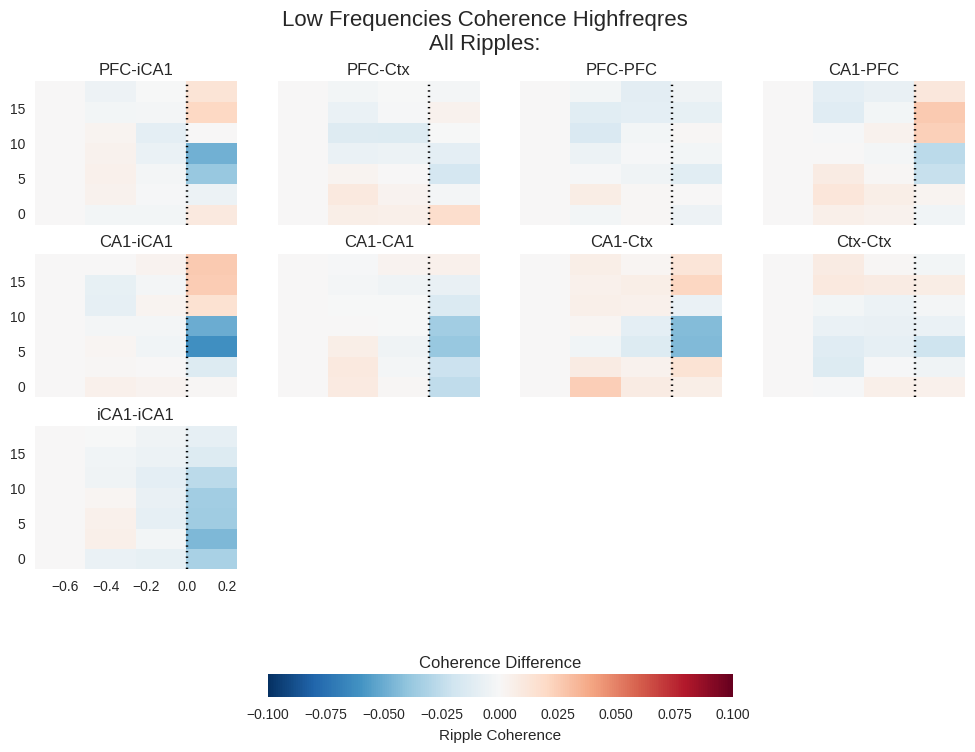

In [24]:
path = ('low_frequencies_coherence_highFreqRes', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Ripple Frequencies

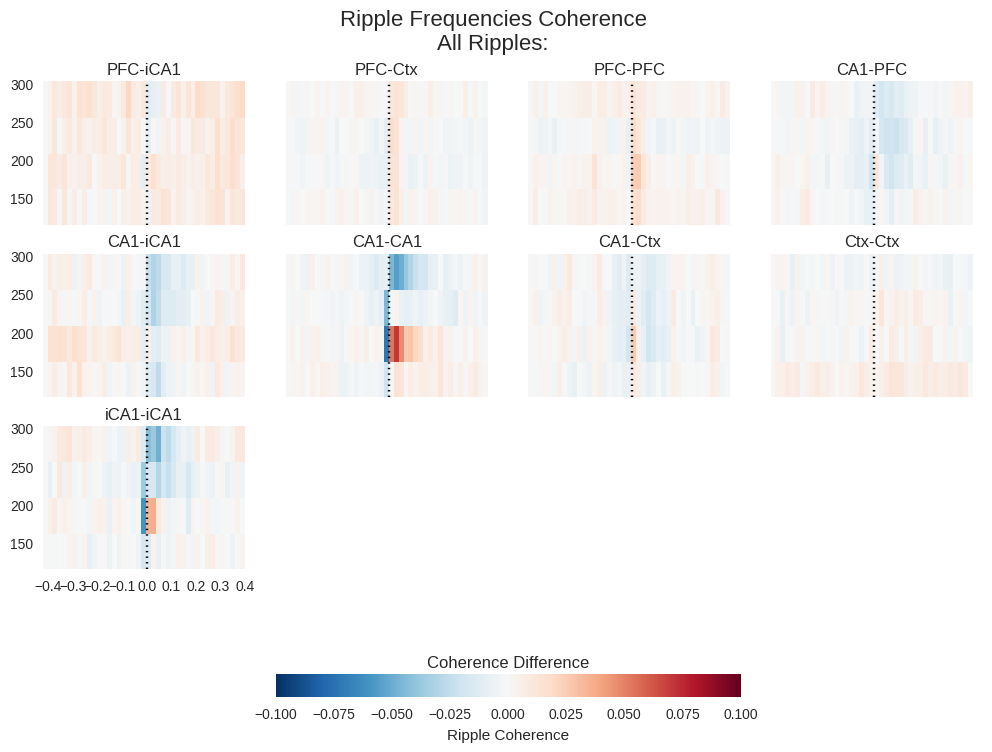

In [ ]:
path = ('ripple_frequencies_coherence', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Difference between Ripple Types

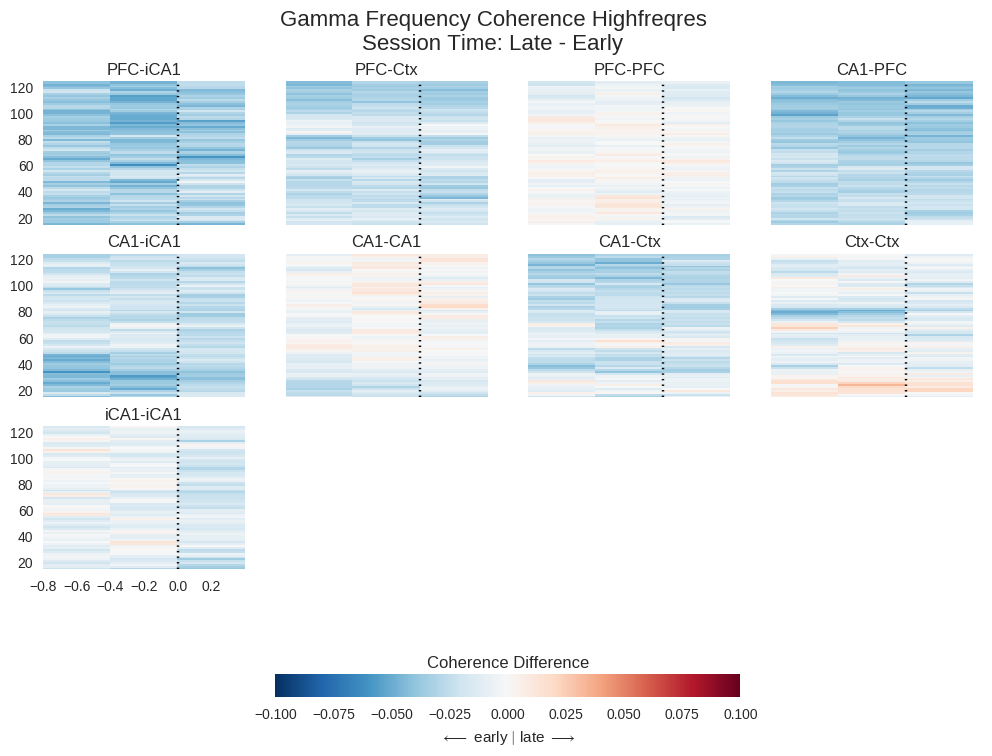

In [25]:
path = ('gamma_frequency_coherence_highFreqRes', 'session_time', 'late_early')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

KeyError: 'No object named /gamma_frequency_coherence_medFreqRes1/tetrode0008_tetrode0015/ripple_direction/forward_reverse in the file'

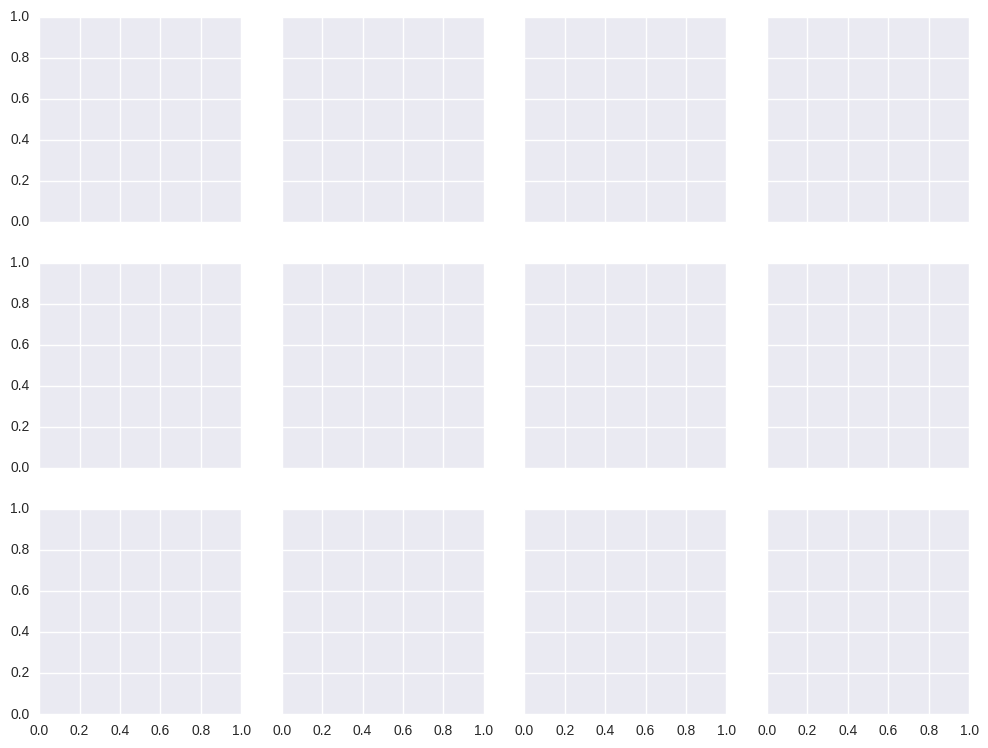

In [28]:
path = ('gamma_frequency_coherence_medFreqRes1', 'ripple_direction', 'forward_reverse')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

KeyError: 'No object named /ripple_frequencies_coherence/tetrode0001_tetrode0018/ripple_trajectory/outbound_inbound in the file'

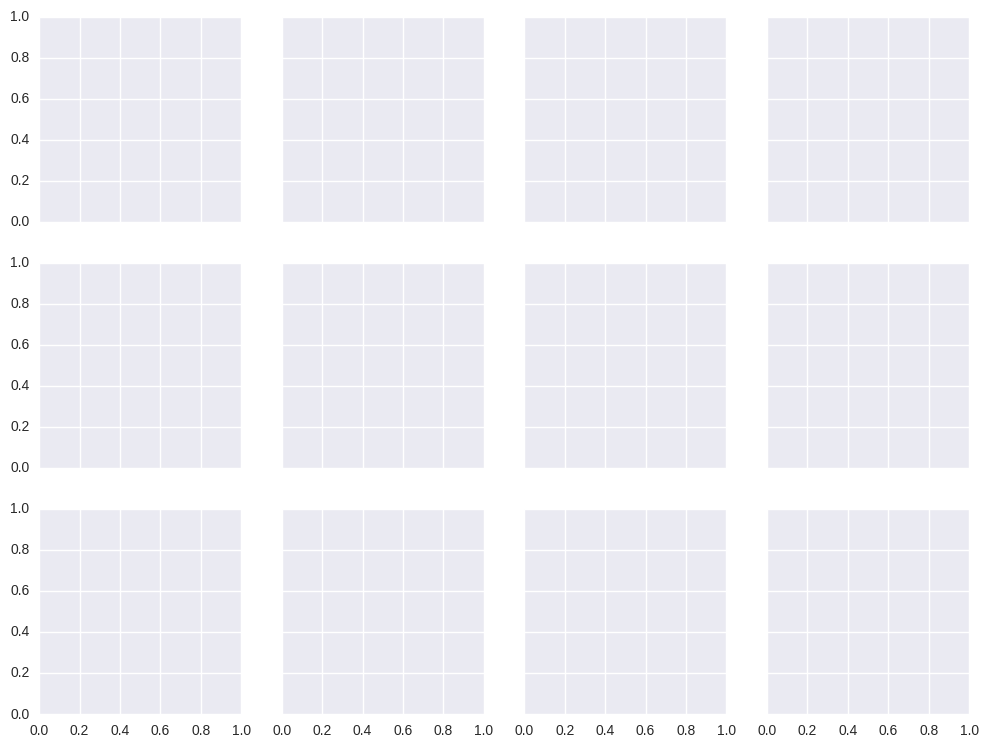

In [4]:
path = ('ripple_frequencies_coherence', 'ripple_trajectory', 'outbound_inbound')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = merge_symmetric_key_pairs(
    tetrode_pair_info.groupby(['area_1', 'area_2']).groups)
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Canonical Coherence

In [10]:
def get_area_pair(*args):
    try:
        return get_area_pair_from_hdf(*args)
    except KeyError:
        pass

def get_area_pair_group_from_hdf5(coherence_name, covariate, level, area1, area2, epoch_index):
    return pd.Panel({epoch: get_area_pair(coherence_name, covariate, level, area1, area2, epoch)
            for epoch in epoch_index})

def plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index,
                                            col_wrap=4, figsize=(12, 9)):
    brain_area_group_pairs = list(combinations(sorted(tetrode_info.area.unique()), 2))
    coherence_name, covariate, level = path
    num_groups = len(brain_area_group_pairs)
    num_rows = int(np.ceil(num_groups / col_wrap))

    fig, axes = plt.subplots(num_rows, col_wrap, figsize=figsize, sharex=True, sharey=True)
    axes = axes.flatten()
    for group_ind, (area1, area2) in enumerate(brain_area_group_pairs):
        try:
            group_coherence = get_area_pair_group_from_hdf5(coherence_name, covariate, level, area1, area2, epoch_index)
            mesh = plot_coherogram(group_coherence.mean(axis=0), axis_handle=axes[group_ind],
                                            vmin=-0.1, vmax=0.1, cmap='RdBu_r')
            axes[group_ind].set_title('-'.join((area1, area2)))
            axes[group_ind].axvline(0, color='black', linestyle=':')
        except AttributeError:
            pass
    for ax in axes[num_groups:]:
        ax.axis('off')
    clb = plt.colorbar(mesh, ax=axes.tolist(), shrink=0.5, orientation='horizontal', label='Ripple Coherence')
    clb.ax.set_title('Coherence Difference')

    title = '{}\n{}:'.format(coherence_name.replace('_', ' ').title(),
                             covariate.replace('_', ' ').title())
    plt.suptitle(title, fontsize=16)


In [6]:
Animal = namedtuple('Animal', {'directory', 'short_name'})
num_days = 8
days = range(1, num_days + 1)
animals = {'HPa': Animal(directory='HPa_direct', short_name='HPa'),
           'HPb': Animal(directory='HPb_direct', short_name='HPb'),
           'HPc': Animal(directory='HPc_direct', short_name='HPc')
           }
epoch_info = make_epochs_dataframe(animals, days)
epoch_index = epoch_info[(epoch_info.type == 'run') & (epoch_info.environment != 'lin')].index

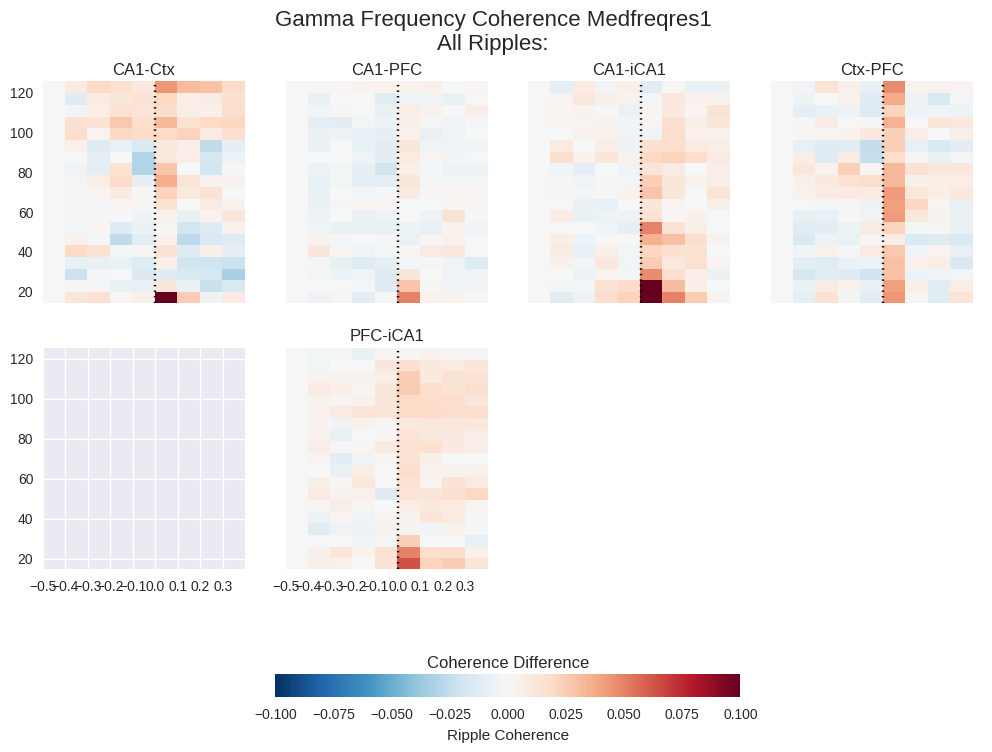

In [11]:
path = ('gamma_frequency_coherence_medFreqRes1', 'all_ripples', '')
tetrode_info = get_all_tetrode_info(path[0])
plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index)

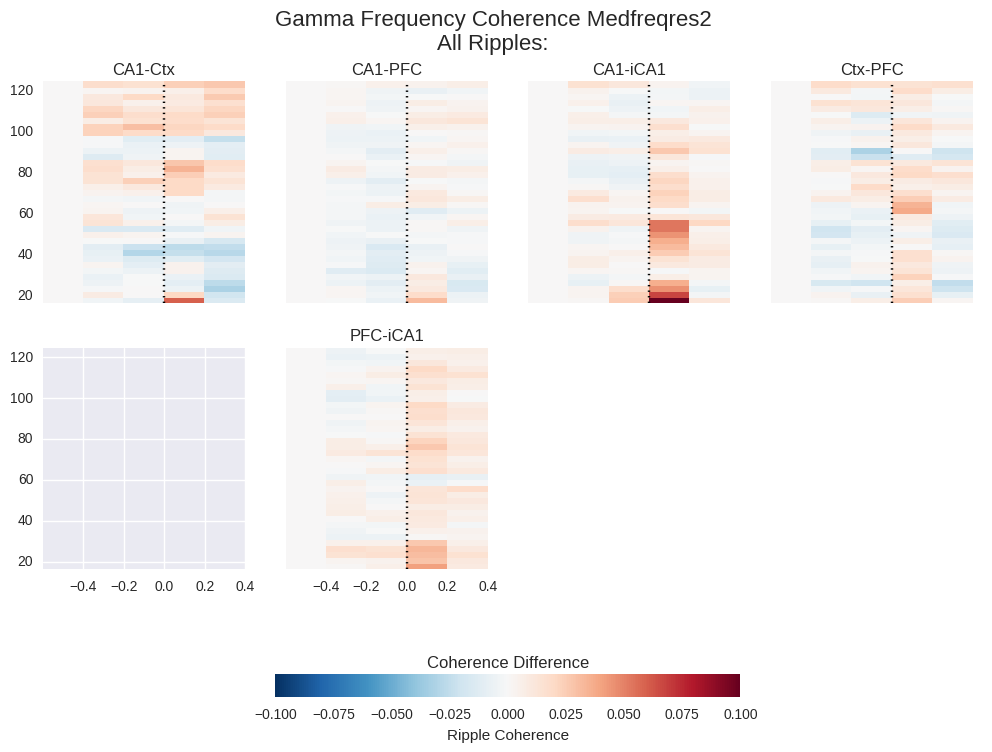

In [13]:
path = ('gamma_frequency_coherence_medFreqRes2', 'all_ripples', '')
tetrode_info = get_all_tetrode_info(path[0])
plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index)

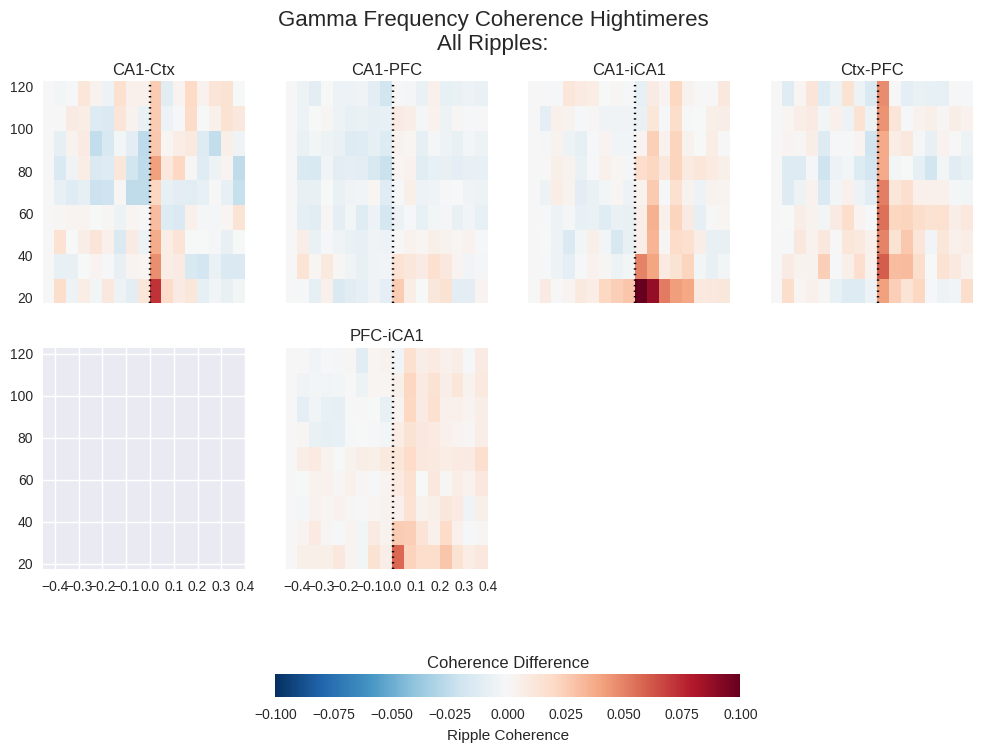

In [14]:
path = ('gamma_frequency_coherence_highTimeRes', 'all_ripples', '')
tetrode_info = get_all_tetrode_info(path[0])
plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index)

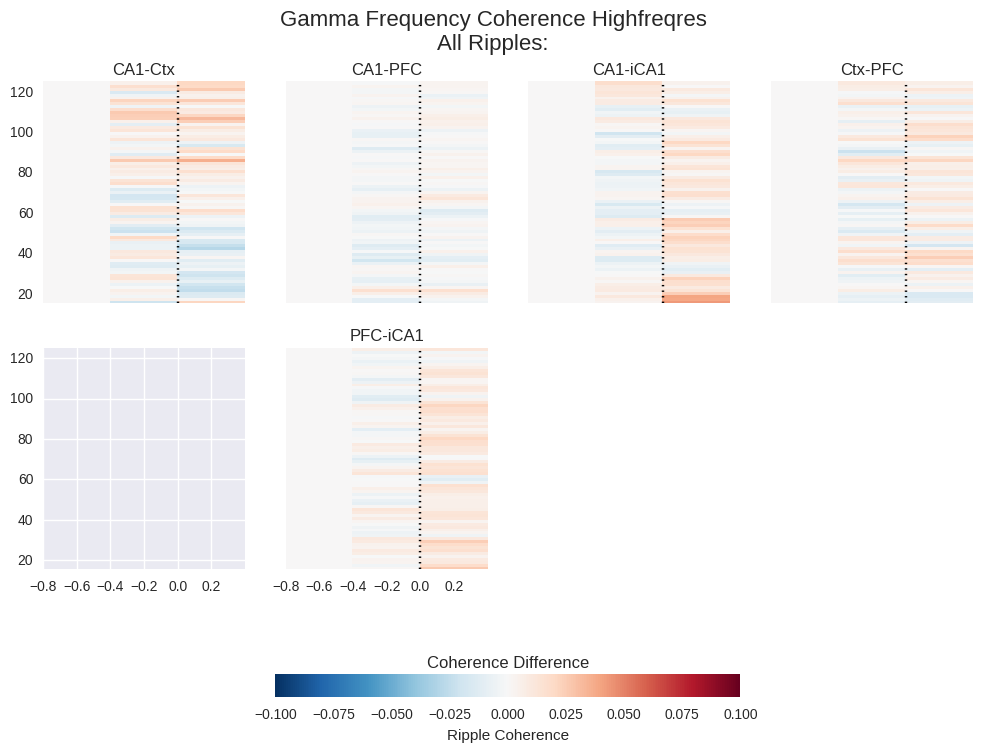

In [16]:
path = ('gamma_frequency_coherence_highFreqRes', 'all_ripples', '')
tetrode_info = get_all_tetrode_info(path[0])
plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index)

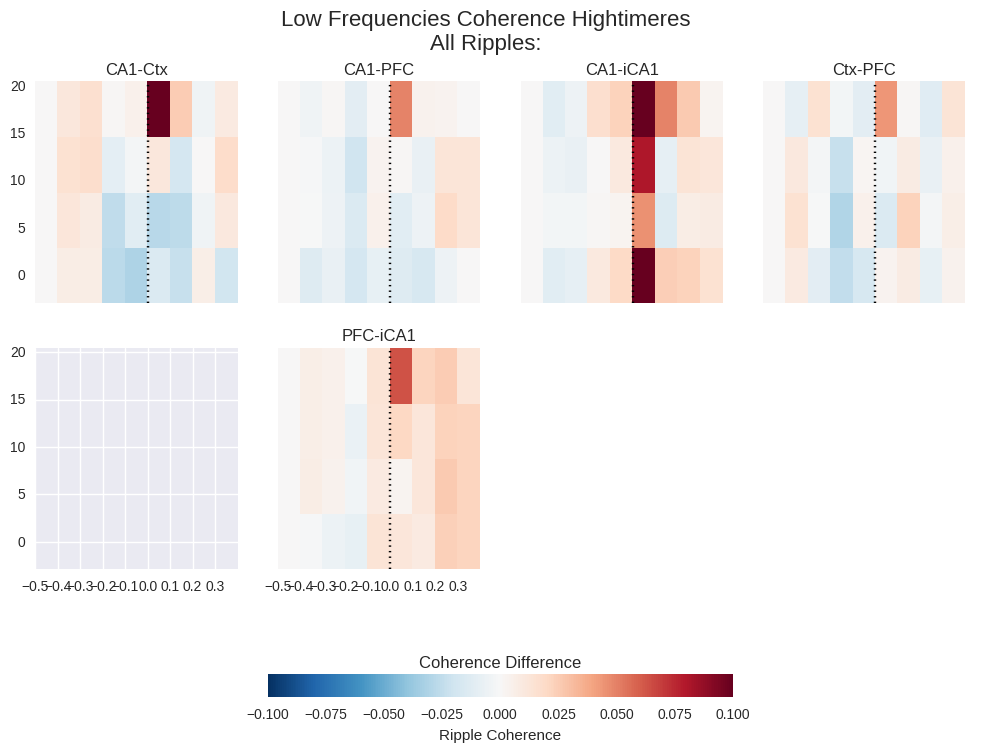

In [17]:
path = ('low_frequencies_coherence_highTimeRes', 'all_ripples', '')
tetrode_info = get_all_tetrode_info(path[0])
plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index)

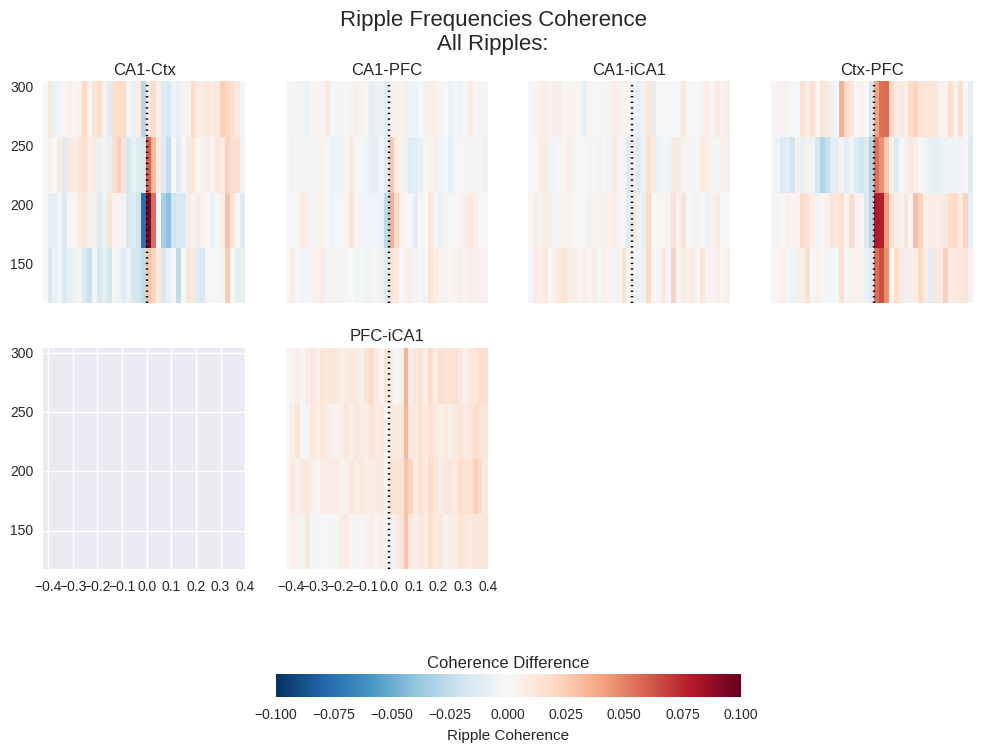

In [18]:
path = ('ripple_frequencies_coherence', 'all_ripples', '')
tetrode_info = get_all_tetrode_info(path[0])
plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index)

## Group Delay

In [24]:
path = ('gamma_frequency_coherence_medFreqRes1', 'all_ripples', '')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
group_coherence = get_tetrode_pair_group_from_hdf(
    tetrode_pair_info.index, path[0], path[1], path[2])

In [34]:
group_coherence.apply(group_delay_over_time, axis=('times', 'major'))

ValueError: No axis named times for object type <class 'pandas.core.panel.Panel'>

In [28]:
group_coherence

<class 'pandas.core.panel.Panel'>
Dimensions: 7868 (items) x 171 (major_axis) x 4 (minor_axis)
Items axis: ((HPa, 1, 4, 1), (HPa, 1, 4, 2)) to ((HPc, 8, 4, 21), (HPc, 8, 4, 22))
Major_axis axis: (17.578125, -0.45) to (123.046875, 0.35)
Minor_axis axis: coherence_magnitude to power_spectrum2

In [36]:
def get_group_delay_from_hdf(tetrode_pair_index, coherence_name,
                             covariate, level):
    return pd.Panel(
        {(tetrode1, tetrode2): group_delay_over_time(
                get_tetrode_pair_from_hdf(
                    coherence_name, covariate, level, tetrode1, tetrode2))
        for tetrode1, tetrode2 in tetrode_pair_index})

In [37]:
group_delay = get_group_delay_from_hdf(tetrode_pair_info.index, path[0], path[1], path[2])

In [42]:
group_delay.to_xarray().loc[:, :, 'slope']

<xarray.DataArray (items: 7868, major_axis: 9)>
array([[  0.00000000e+00,  -3.07920895e-04,  -7.66584500e-04, ...,
         -1.16834388e-03,  -3.55008891e-04,  -6.82219795e-04],
       [  0.00000000e+00,  -2.43547925e-04,  -7.21215702e-04, ...,
          8.85535075e-06,  -3.20543701e-04,   1.76025062e-04],
       [  0.00000000e+00,  -7.33761381e-04,  -2.29206136e-04, ...,
         -1.63827520e-03,  -1.98382921e-03,  -8.04195496e-04],
       ..., 
       [  0.00000000e+00,  -4.64323524e-03,  -3.91189608e-03, ...,
          1.22808096e-03,  -1.58614007e-03,  -3.86383949e-03],
       [  0.00000000e+00,  -1.09886808e-02,   7.77672316e-03, ...,
         -2.20569345e-03,  -8.23701844e-03,  -2.88523514e-03],
       [  0.00000000e+00,  -3.27077690e-03,  -5.57826911e-03, ...,
         -4.35210022e-03,  -5.58541976e-03,  -4.62313138e-03]])
Coordinates:
  * items       (items) object (('HPa', 1, 4, 1), ('HPa', 1, 4, 2)) ...
  * major_axis  (major_axis) float64 -0.45 -0.35 -0.25 -0.15 -0.05 0.05 0

In [51]:
areas = sorted(
    list(set(tetrode_pair_info.area_1.unique().tolist() +
             tetrode_pair_info.area_2.unique().tolist())))
areas

['CA1', 'Ctx', 'PFC', 'iCA1']

In [53]:
list(combinations(areas, 2))

[('CA1', 'Ctx'),
 ('CA1', 'PFC'),
 ('CA1', 'iCA1'),
 ('Ctx', 'PFC'),
 ('Ctx', 'iCA1'),
 ('PFC', 'iCA1')]

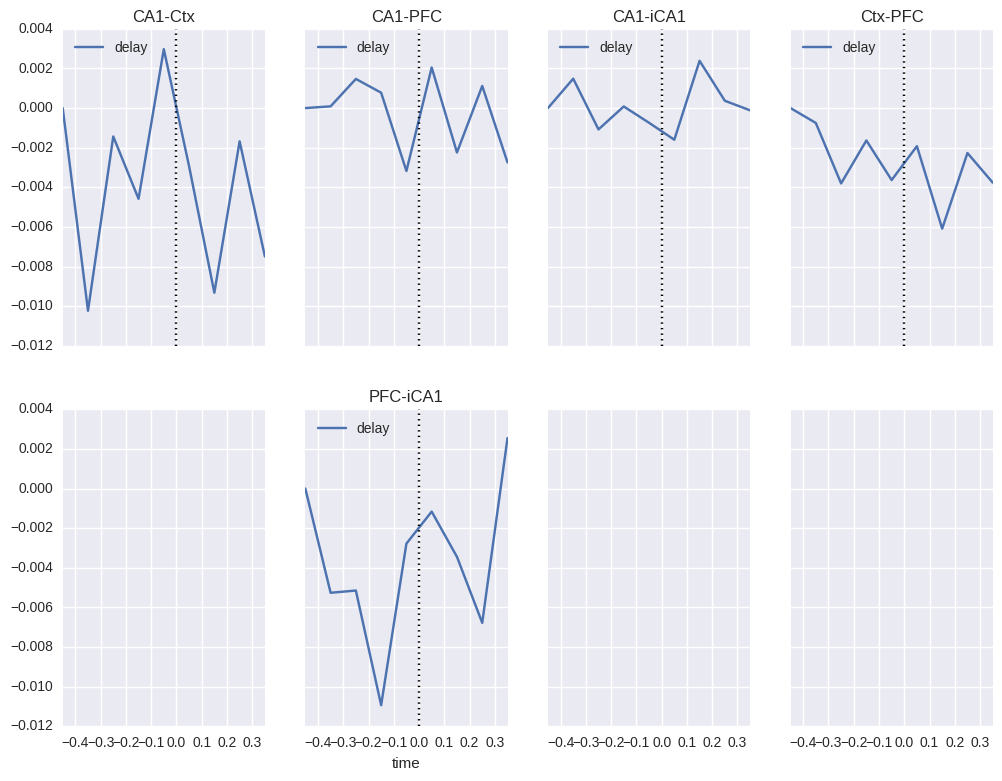

In [99]:
col_wrap=4
figsize=(12, 9)

areas = sorted(
    list(set(tetrode_pair_info.area_1.unique().tolist() +
             tetrode_pair_info.area_2.unique().tolist())))
area_pairs = list(combinations(areas, 2))

coherence_name, covariate, difference_level = path
num_groups = len(area_pairs)
num_rows = int(np.ceil(num_groups / col_wrap))

fig, axes = plt.subplots(num_rows, col_wrap,
                         figsize=figsize,
                         sharex=True, sharey=True)
axes = axes.flatten()

for pair_ind, (area1, area2) in enumerate(area_pairs):
    index1 = tetrode_pair_info.loc[
        (tetrode_pair_info.area_1 == area1) &
        (tetrode_pair_info.area_2 == area2), :].index
    index2 = tetrode_pair_info.loc[
        (tetrode_pair_info.area_1 == area2) &
        (tetrode_pair_info.area_2 == area1), :].index
    slope1 = get_group_delay_from_hdf(index1, *path)
    slope2 = get_group_delay_from_hdf(index2, *path)
    if (len(slope1) > 0) and (len(slope2) > 0):
        combined_slopes = (slope1.loc[:, :, ['delay']]
                           .join(-1 * slope2.loc[:, :, ['delay']]))
    elif len(slope1) > 0:
        combined_slopes = slope1.loc[:, :, ['delay']]
    elif len(slope2) > 0:
        combined_slopes = slope2.loc[:, :, ['delay']]
    else:
        continue
    combined_slopes.mean(axis=0).plot(ax=axes[pair_ind])
    axes[pair_ind].set_title('-'.join(area_pairs[pair_ind]))
    axes[pair_ind].axvline(0, color='black', linestyle=':')
    axes[pair_ind].axhline(0, color='black', linestyle=':')